In [1]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install missingno
import missingno as msno 
# !pip install chardet
import chardet

In [2]:
locales = pd.read_csv(r"C:\Users\Yeider\Desktop\Master Visual Analitics And Big Data\Gobierno del dato y toma de decisiones\Actividades\Actividad 1\Locales.csv", encoding='latin1', delimiter=';')
print(locales.shape)  
locales.sample(10)

(148216, 40)


id_local  id_distrito_local   desc_distrito_local  id_barrio_local  \
621     170000407                 17  VILLAVERDE                       1704   
143799  280039708                  9  MONCLOA-ARAVACA                   906   
27354   280072006                 15  CIUDAD LINEAL                    1502   
16652   270446283                  7  CHAMBERI                          703   
59476   280058351                 13  PUENTE DE VALLECAS               1305   
13572   270539914                 15  CIUDAD LINEAL                    1509   
38557   285030499                 17  VILLAVERDE                       1701   
13481   270538435                  2  ARGANZUELA                        202   
112140  285035389                 13  PUENTE DE VALLECAS               1302   
47085   280037376                  7  CHAMBERI                          704   

           desc_barrio_local  cod_barrio_local  id_seccion_censal_local  \
621     LOS ROSALES                        NaN                      NaN   
143799  EL PLANTIO                         NaN                      NaN   
27354   PUEBLO NUEVO                       NaN                      NaN   
16652   TRAFALGAR                          NaN                      NaN   
59476   PORTAZGO                           NaN                      NaN   
13572   COSTILLARES                        NaN                      NaN   
38557   SAN ANDRES                         NaN                      NaN   
13481   ACACIAS                            NaN                      NaN   
112140  SAN DIEGO                          NaN                      NaN   
47085   ALMAGRO                            NaN                      NaN   

        desc_seccion_censal_local coordenada_x_local coordenada_y_local  ...  \
621                            51          441244,54         4467334,51  ...   
143799                         72          430959,67         4479975,64  ...   
27354                         179          447000,55         4474394,44  ...   
16652                          59           440430,6         4476156,53  ...   
59476                         150          444816,55         4470755,47  ...   
13572                         172                  0                  0  ...   
38557                          15          439260,54         4466275,52  ...   
13481                          27                  0                  0  ...   
112140                         61          443285,56         4470667,49  ...   
47085                          76          441167,59         4475562,52  ...   

        cal_acceso coordenada_x_agrupacion  coordenada_y_agrup id_agrupacion  \
621                                    NaN                 NaN           NaN   
143799                           430959,67          4479975,64    99000162.0   
27354                                  NaN                 NaN           NaN   
16652                                  NaN                 NaN           NaN   
59476                                  NaN                 NaN           NaN   
13572                                  NaN                 NaN           NaN   
38557                                  NaN                 NaN           NaN   
13481                            440414,59          4472377,52    99000002.0   
112140                                 NaN                 NaN           NaN   
47085                                  NaN                 NaN           NaN   

                     nombre_agrupacion id_tipo_agrup          desc_tipo_agrup  \
621                                NaN           NaN                      NaN   
143799  CENTRO COMERCIAL SEXTA AVENIDA           1.0         Centro Comercial   
27354                              NaN           NaN                      NaN   
16652                              NaN           NaN                      NaN   
59476                              NaN           NaN                      NaN   
13572                              NaN           NaN             

In [12]:
# Crear una lista para almacenar los datos
datos_a_agregar = []
# Recorrer los datos
for columna in locales.columns:
    categorias = locales[columna].unique()
    datos_a_agregar.append({'Atributo': columna, 'Categorias': categorias})
# Crear el DataFrame fuera del bucle
atributos_categorias = pd.DataFrame(datos_a_agregar)

display(atributos_categorias)

Atributo  \
0                    id_local   
1           id_distrito_local   
2         desc_distrito_local   
3             id_barrio_local   
4           desc_barrio_local   
5            cod_barrio_local   
6     id_seccion_censal_local   
7   desc_seccion_censal_local   
8          coordenada_x_local   
9          coordenada_y_local   
10       id_tipo_acceso_local   
11     desc_tipo_acceso_local   
12         id_situacion_local   
13       desc_situacion_local   
14           id_vial_edificio   
15        clase_vial_edificio   
16         desc_vial_edificio   
17            id_ndp_edificio   
18      id_clase_ndp_edificio   
19               nom_edificio   
20               num_edificio   
21               cal_edificio   
22        secuencial_local_PC   
23             id_vial_acceso   
24          clase_vial_acceso   
25           desc_vial_acceso   
26              id_ndp_acceso   
27        id_clase_ndp_acceso   
28                 nom_acceso   
29                 num_acceso   
30                 cal_acceso   
31    coordenada_x_agrupacion   
32         coordenada_y_agrup   
33              id_agrupacion   
34          nombre_agrupacion   
35              id_tipo_agrup   
36            desc_tipo_agrup   
37         id_planta_agrupado   
38          id_local_agrupado   
39                     rotulo   

                                           Categorias  
0   [280046845, 280046855, 280046865, 280046871, 2...  
1   [8, 4, 17, 12, 1, 5, 2, 7, 15, 16, 10, 9, 11, ...  
2   [FUENCARRAL-EL PARDO , SALAMANCA           , V...  
3   [803, 804, 805, 401, 1705, 1204, 1207, 104, 50...  
4   [PEÑA GRANDE         , EL PILAR            , L...  
5                                               [nan]  
6                                               [nan]  
7   [21, 23, 26, 28, 31, 32, 33, 34, 144, 36, 37, ...  
8   [439101,63, 438817,63, 438986,63, 439093,63, 4...  
9   [4481402,56, 4481326,57, 4481184,56, 4481280,5...  
10                                              [nan]  
11              [Puerta Calle, Agrupado, PC Asociado]  
12                             [1, 4, 9, 8, 7, 5, 10]  
13  [Abierto, Cerrado, Baja Reunificacion, Baja, E...  
14                                              [nan]  
15  [CALLE                   , AVENIDA            ...  
16  [ISLAS CIES                                   ...  
17  [11045564, 11045586, 11045624, 11045638, 11045...  
18                                                [1]  
19                                         [NUM, KM.]  
20  [6, 16, 51, 23, 76, 91, 93, 1, 57, 65, 70, 165...  
21  [  ,  C,  B,  A,  Q,  G,  D,  J, SA,  O,  M,  ...  
22  [40, 30, 20, 10, 60, 100, 280, 170, 210, 230, ...  
23                                              [nan]  
24  [CALLE                   , AVENIDA            ...  
25  [ISLAS CIES                                   ...  
26  [11045564, 11142297, 31045308, 11045638, 11045...  
27                                                [1]  
28                                         [NUM, KM.]  
29  [6, 255, 88, 23, 16, 76, 91, 93, 4, 57, 65, 70...  
30  [  ,  C,  B,  A,  Q,  D,  H,  G,  J, SA,  O,  ...  
31  [nan, 440496,58, 445879,57, 444279,58, 446088,...  
32  [nan, 4470878,52, 4476498,46, 4476078,48, 4480...  
33  [nan, 99000223.0, 99000087.0, 99000092.0, 9900...  
34  [nan, MERCADO MUNICIPAL JESUS DEL GRAN PODER, ...  
35  [nan, 12.0, 1.0, 4.0, 13.0, 15.0, 16.0, 7.0, 1...  
36  [nan, Mercado Municipal, Centro Comercial, Gal...  
37  [PB, 1, SS, S1, nan, 3, SO, -1, 2, 01, 02, EX,...  
38  [nan, 51, 66, 14, 106, GA10, 34, 25, 10, 1, L4...  
39  [GARAJE ISLAS CIES, DEFIRIS, PELUQUERIAS LOW C...

In [14]:
# Verificar el tipo de dato de cada columna 
locales.dtypes

id_local                       int64
id_distrito_local              int64
desc_distrito_local           object
id_barrio_local                int64
desc_barrio_local             object
cod_barrio_local             float64
id_seccion_censal_local      float64
desc_seccion_censal_local      int64
coordenada_x_local            object
coordenada_y_local            object
id_tipo_acceso_local         float64
desc_tipo_acceso_local        object
id_situacion_local             int64
desc_situacion_local          object
id_vial_edificio             float64
clase_vial_edificio           object
desc_vial_edificio            object
id_ndp_edificio                int64
id_clase_ndp_edificio          int64
nom_edificio                  object
num_edificio                   int64
cal_edificio                  object
secuencial_local_PC            int64
id_vial_acceso               float64
clase_vial_acceso             object
desc_vial_acceso              object
id_ndp_acceso                  int64
i

In [15]:
# Verificar Valores nulos
locales.isnull().sum() 

id_local                          0
id_distrito_local                 0
desc_distrito_local               0
id_barrio_local                   0
desc_barrio_local                 0
cod_barrio_local             148216
id_seccion_censal_local      148216
desc_seccion_censal_local         0
coordenada_x_local                0
coordenada_y_local                0
id_tipo_acceso_local         148216
desc_tipo_acceso_local            0
id_situacion_local                0
desc_situacion_local              0
id_vial_edificio             148216
clase_vial_edificio               0
desc_vial_edificio                0
id_ndp_edificio                   0
id_clase_ndp_edificio             0
nom_edificio                      0
num_edificio                      0
cal_edificio                      0
secuencial_local_PC               0
id_vial_acceso               148216
clase_vial_acceso                 0
desc_vial_acceso                  0
id_ndp_acceso                     0
id_clase_ndp_acceso         

<Axes: >

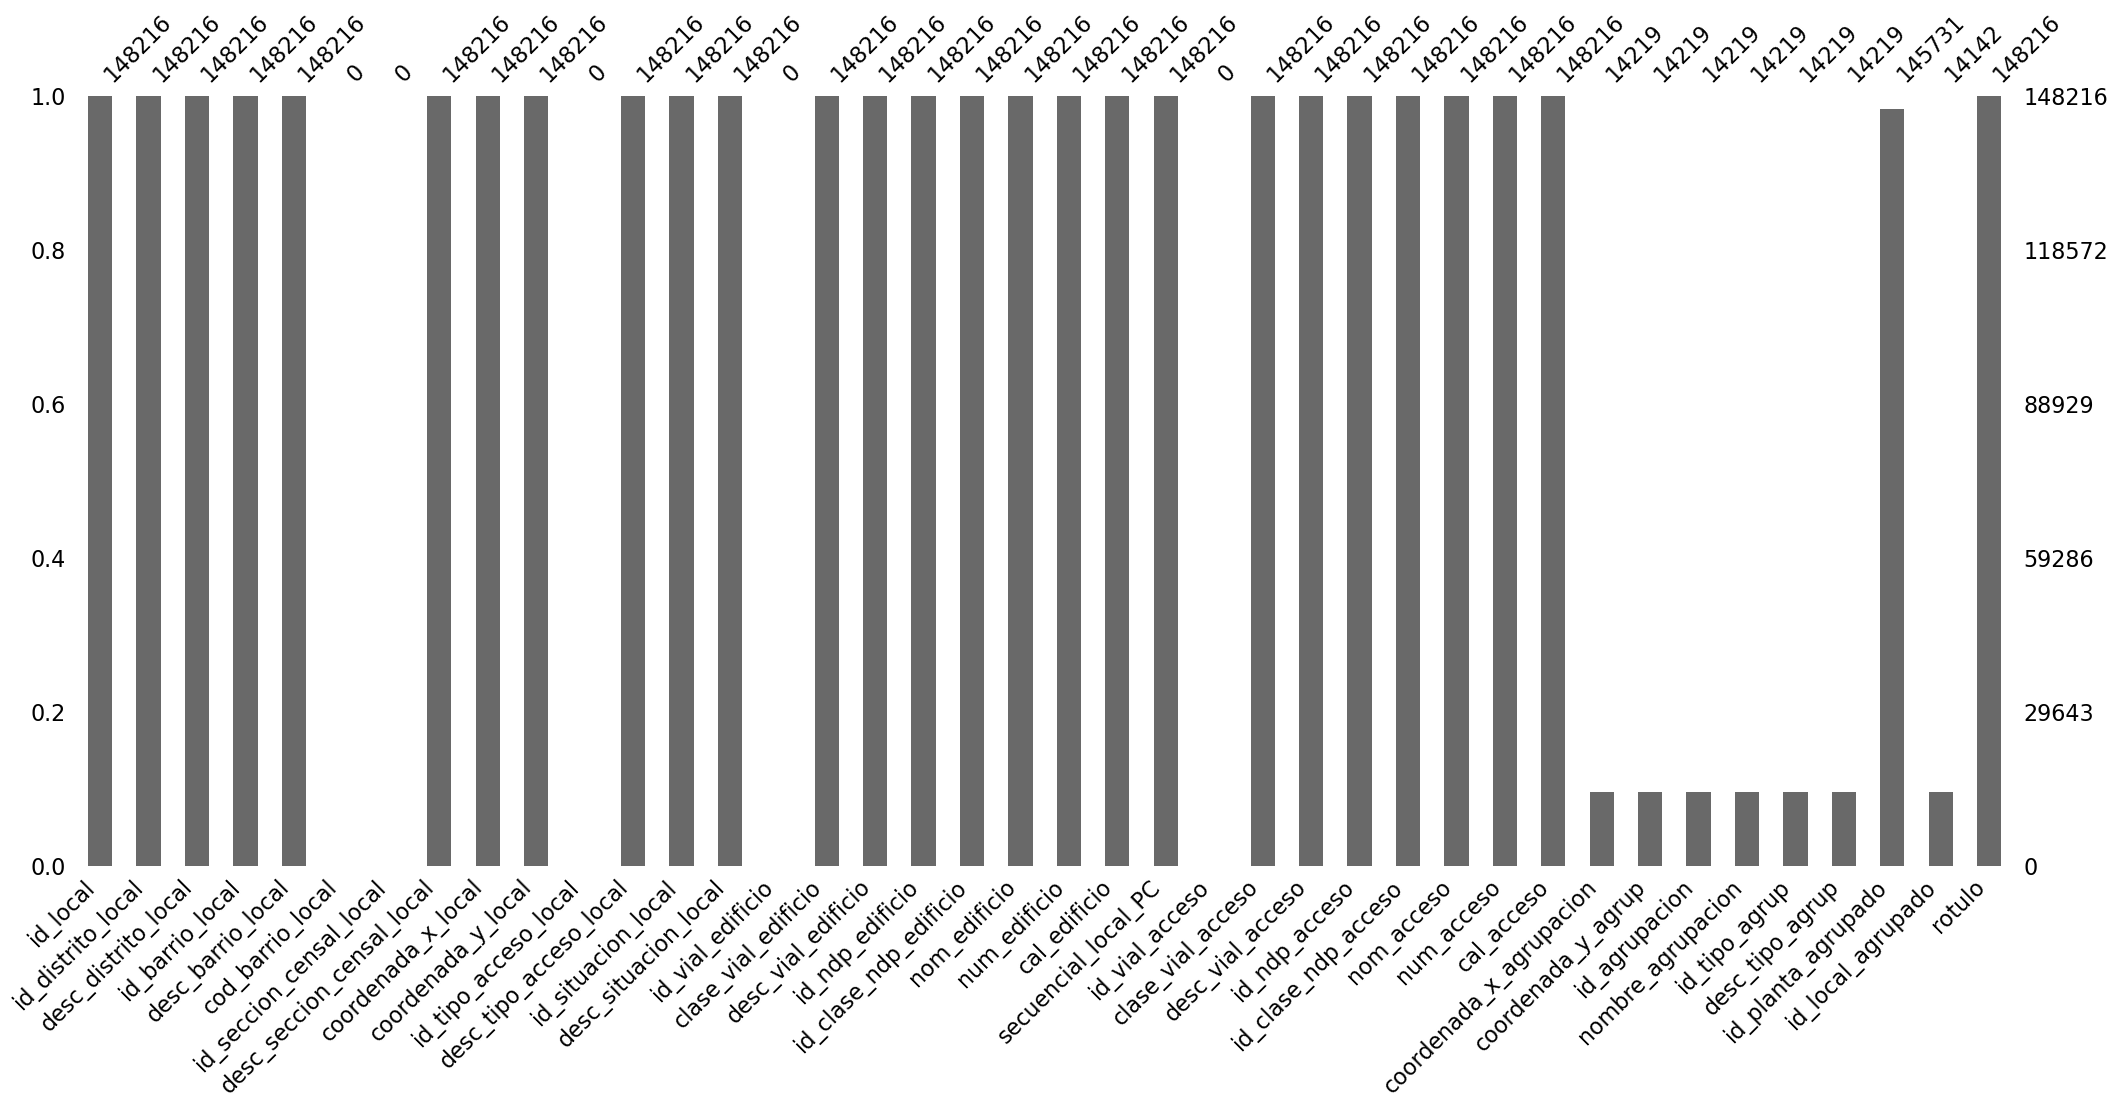

In [18]:
msno.bar(locales)

c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


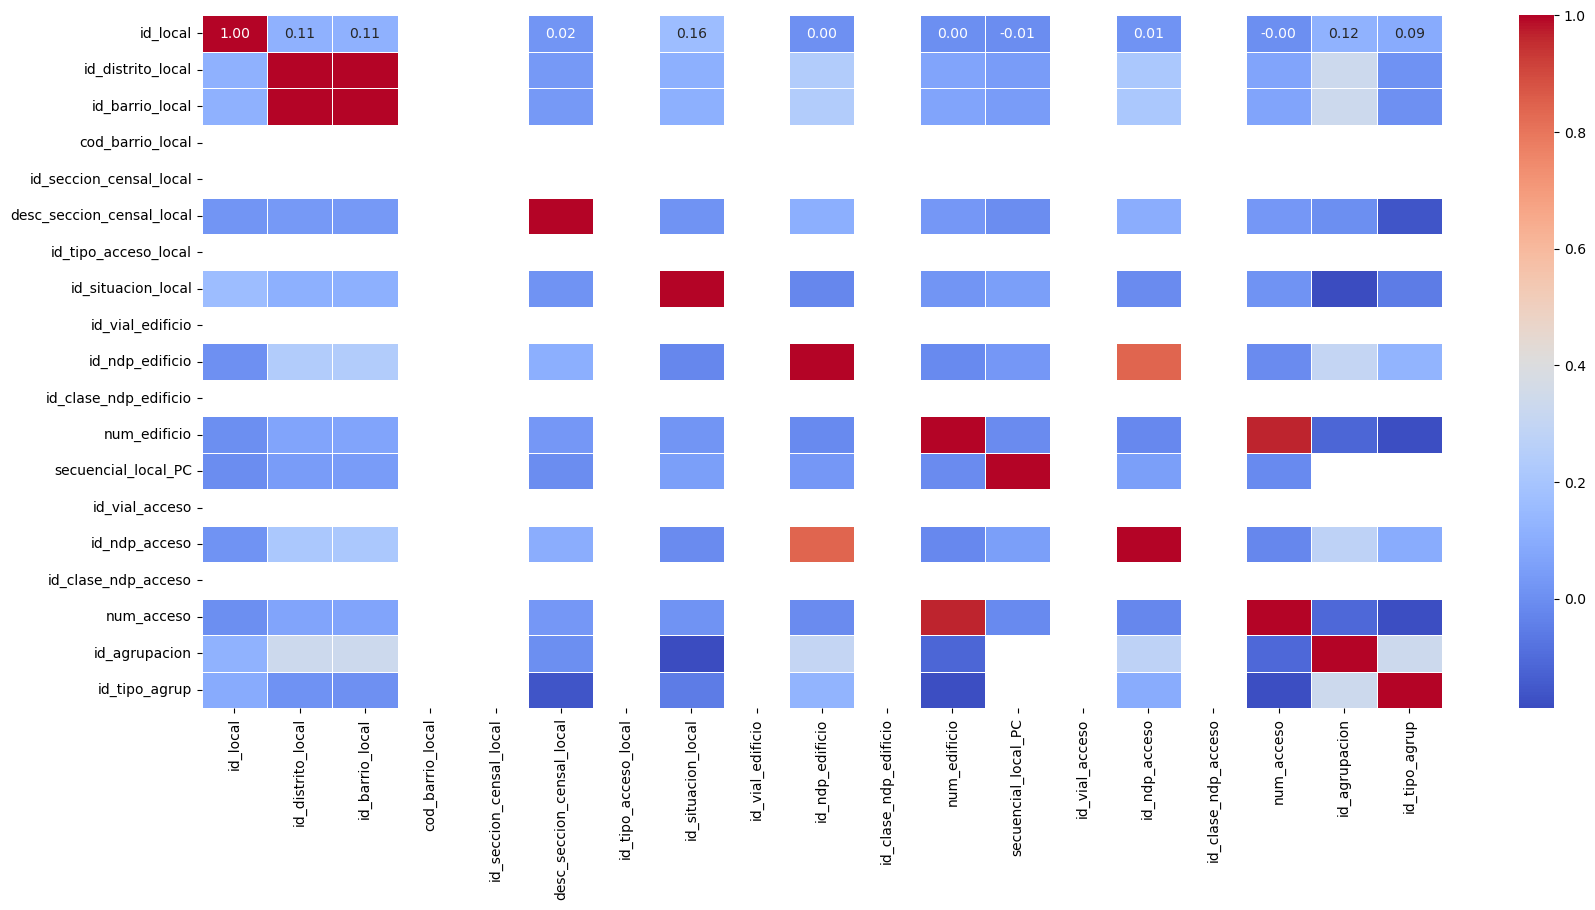

In [20]:

# Filtrar solo columnas numéricas del DataFrame
plt.figure(figsize=(20, 9))
df_numerico = locales.select_dtypes(include=['number'])
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f",linewidth=.5)
plt.show()


c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

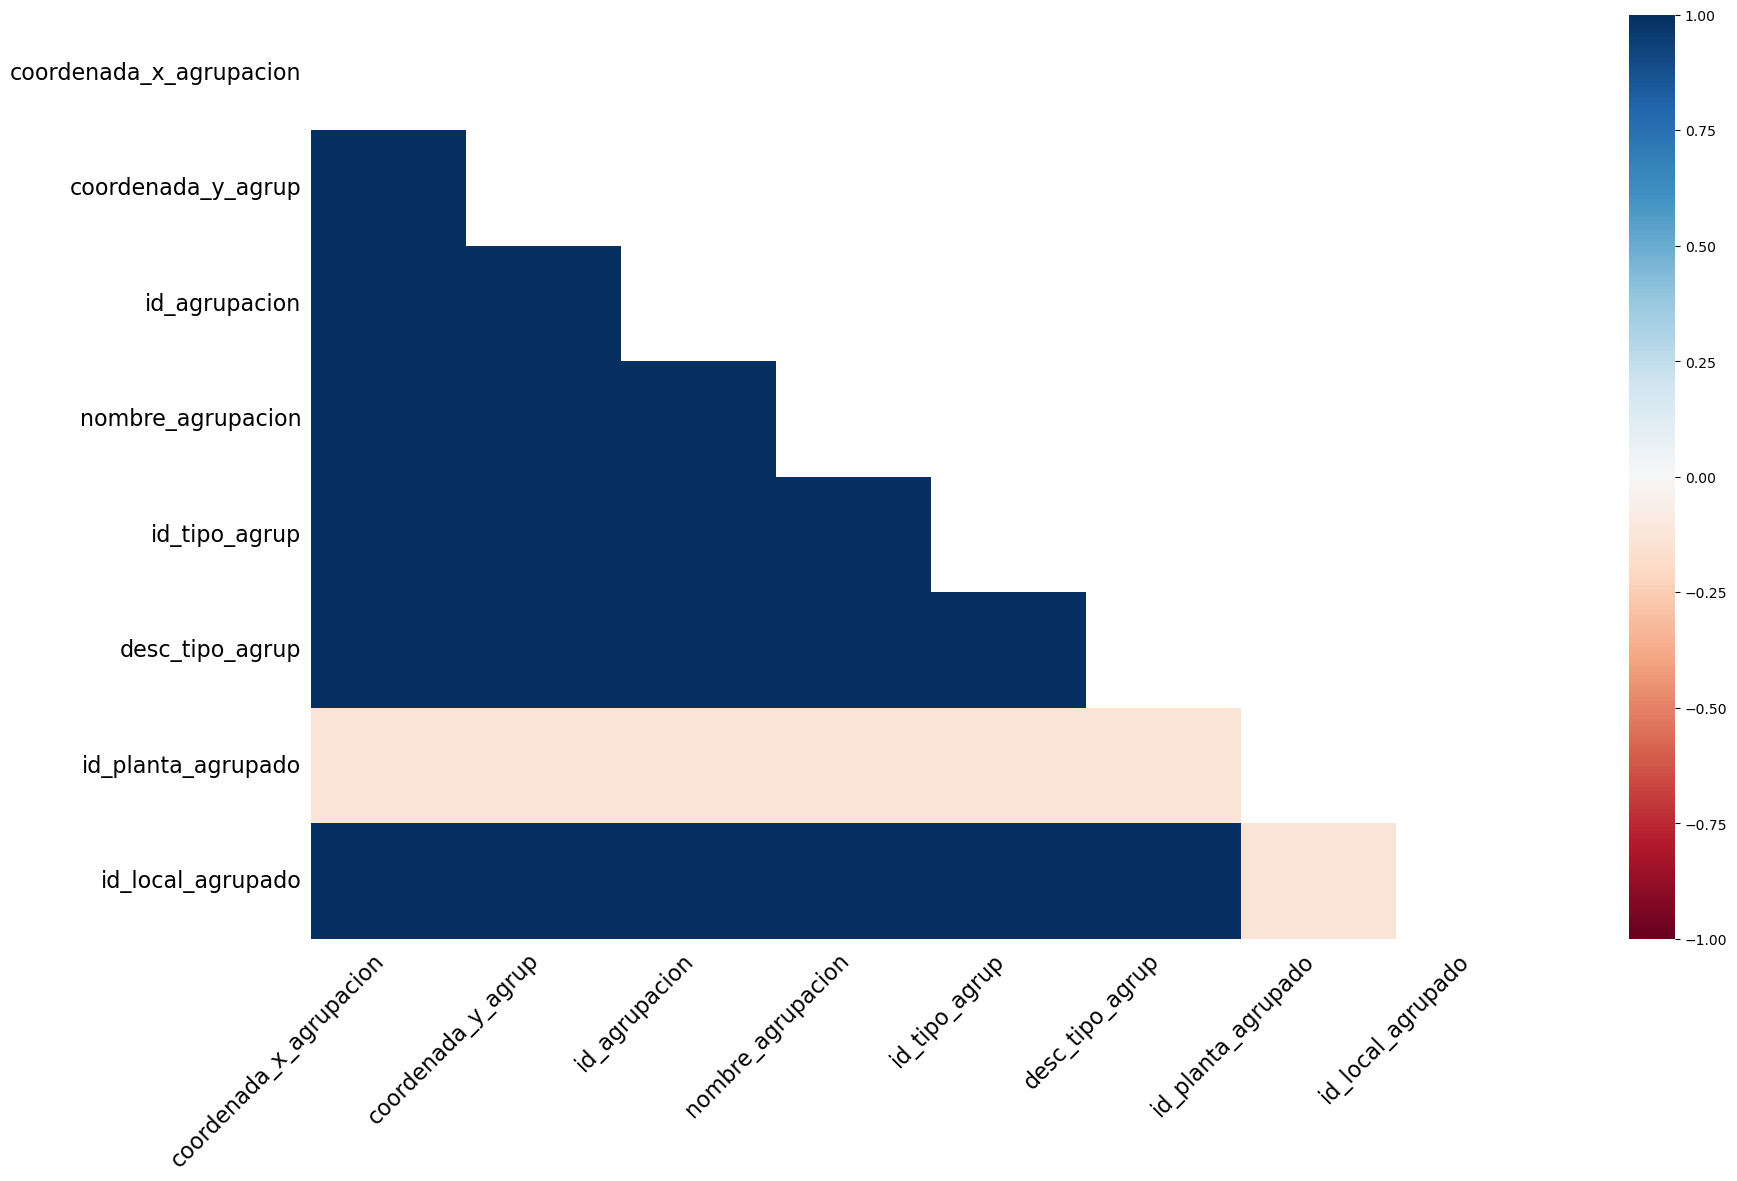

In [25]:
msno.heatmap(locales)

<Axes: >

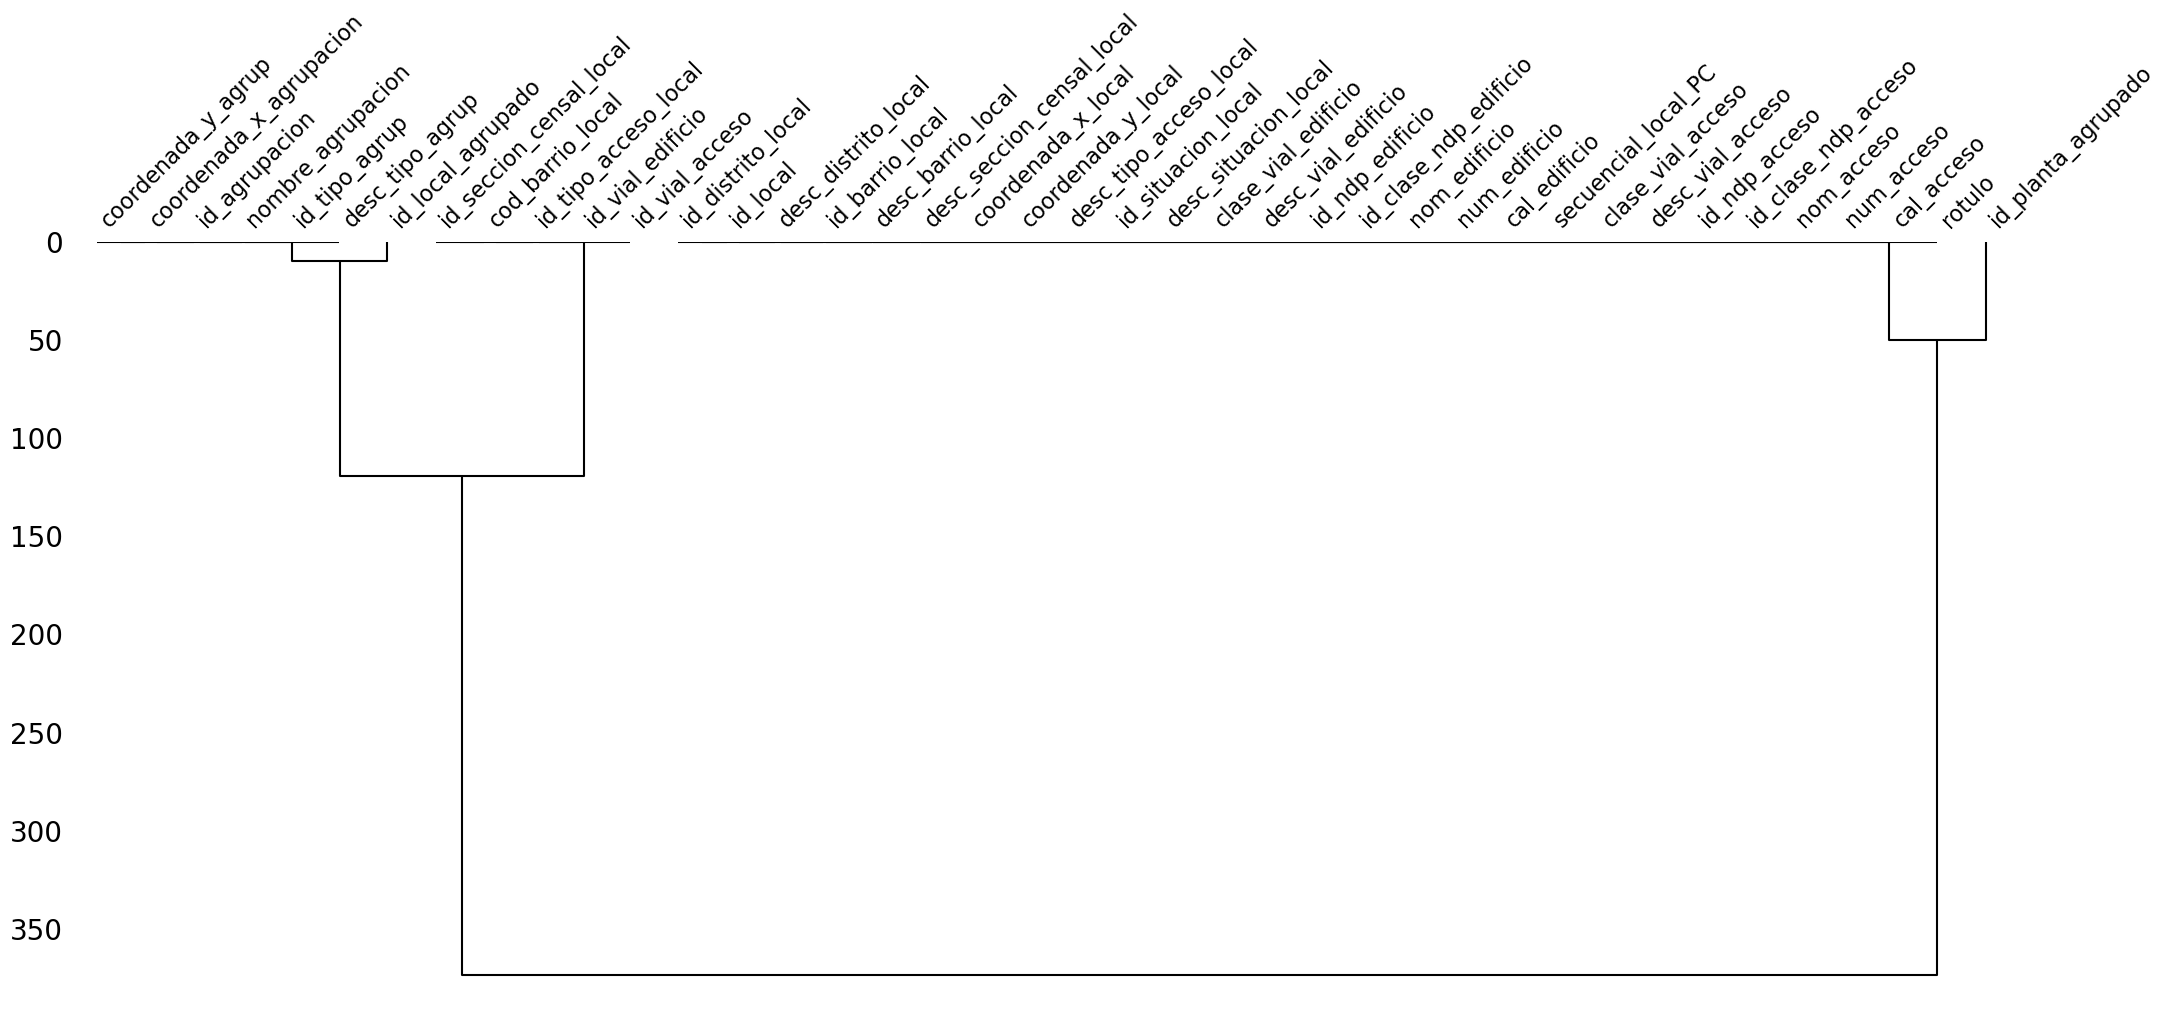

In [21]:
msno.dendrogram(locales)

c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yeider\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

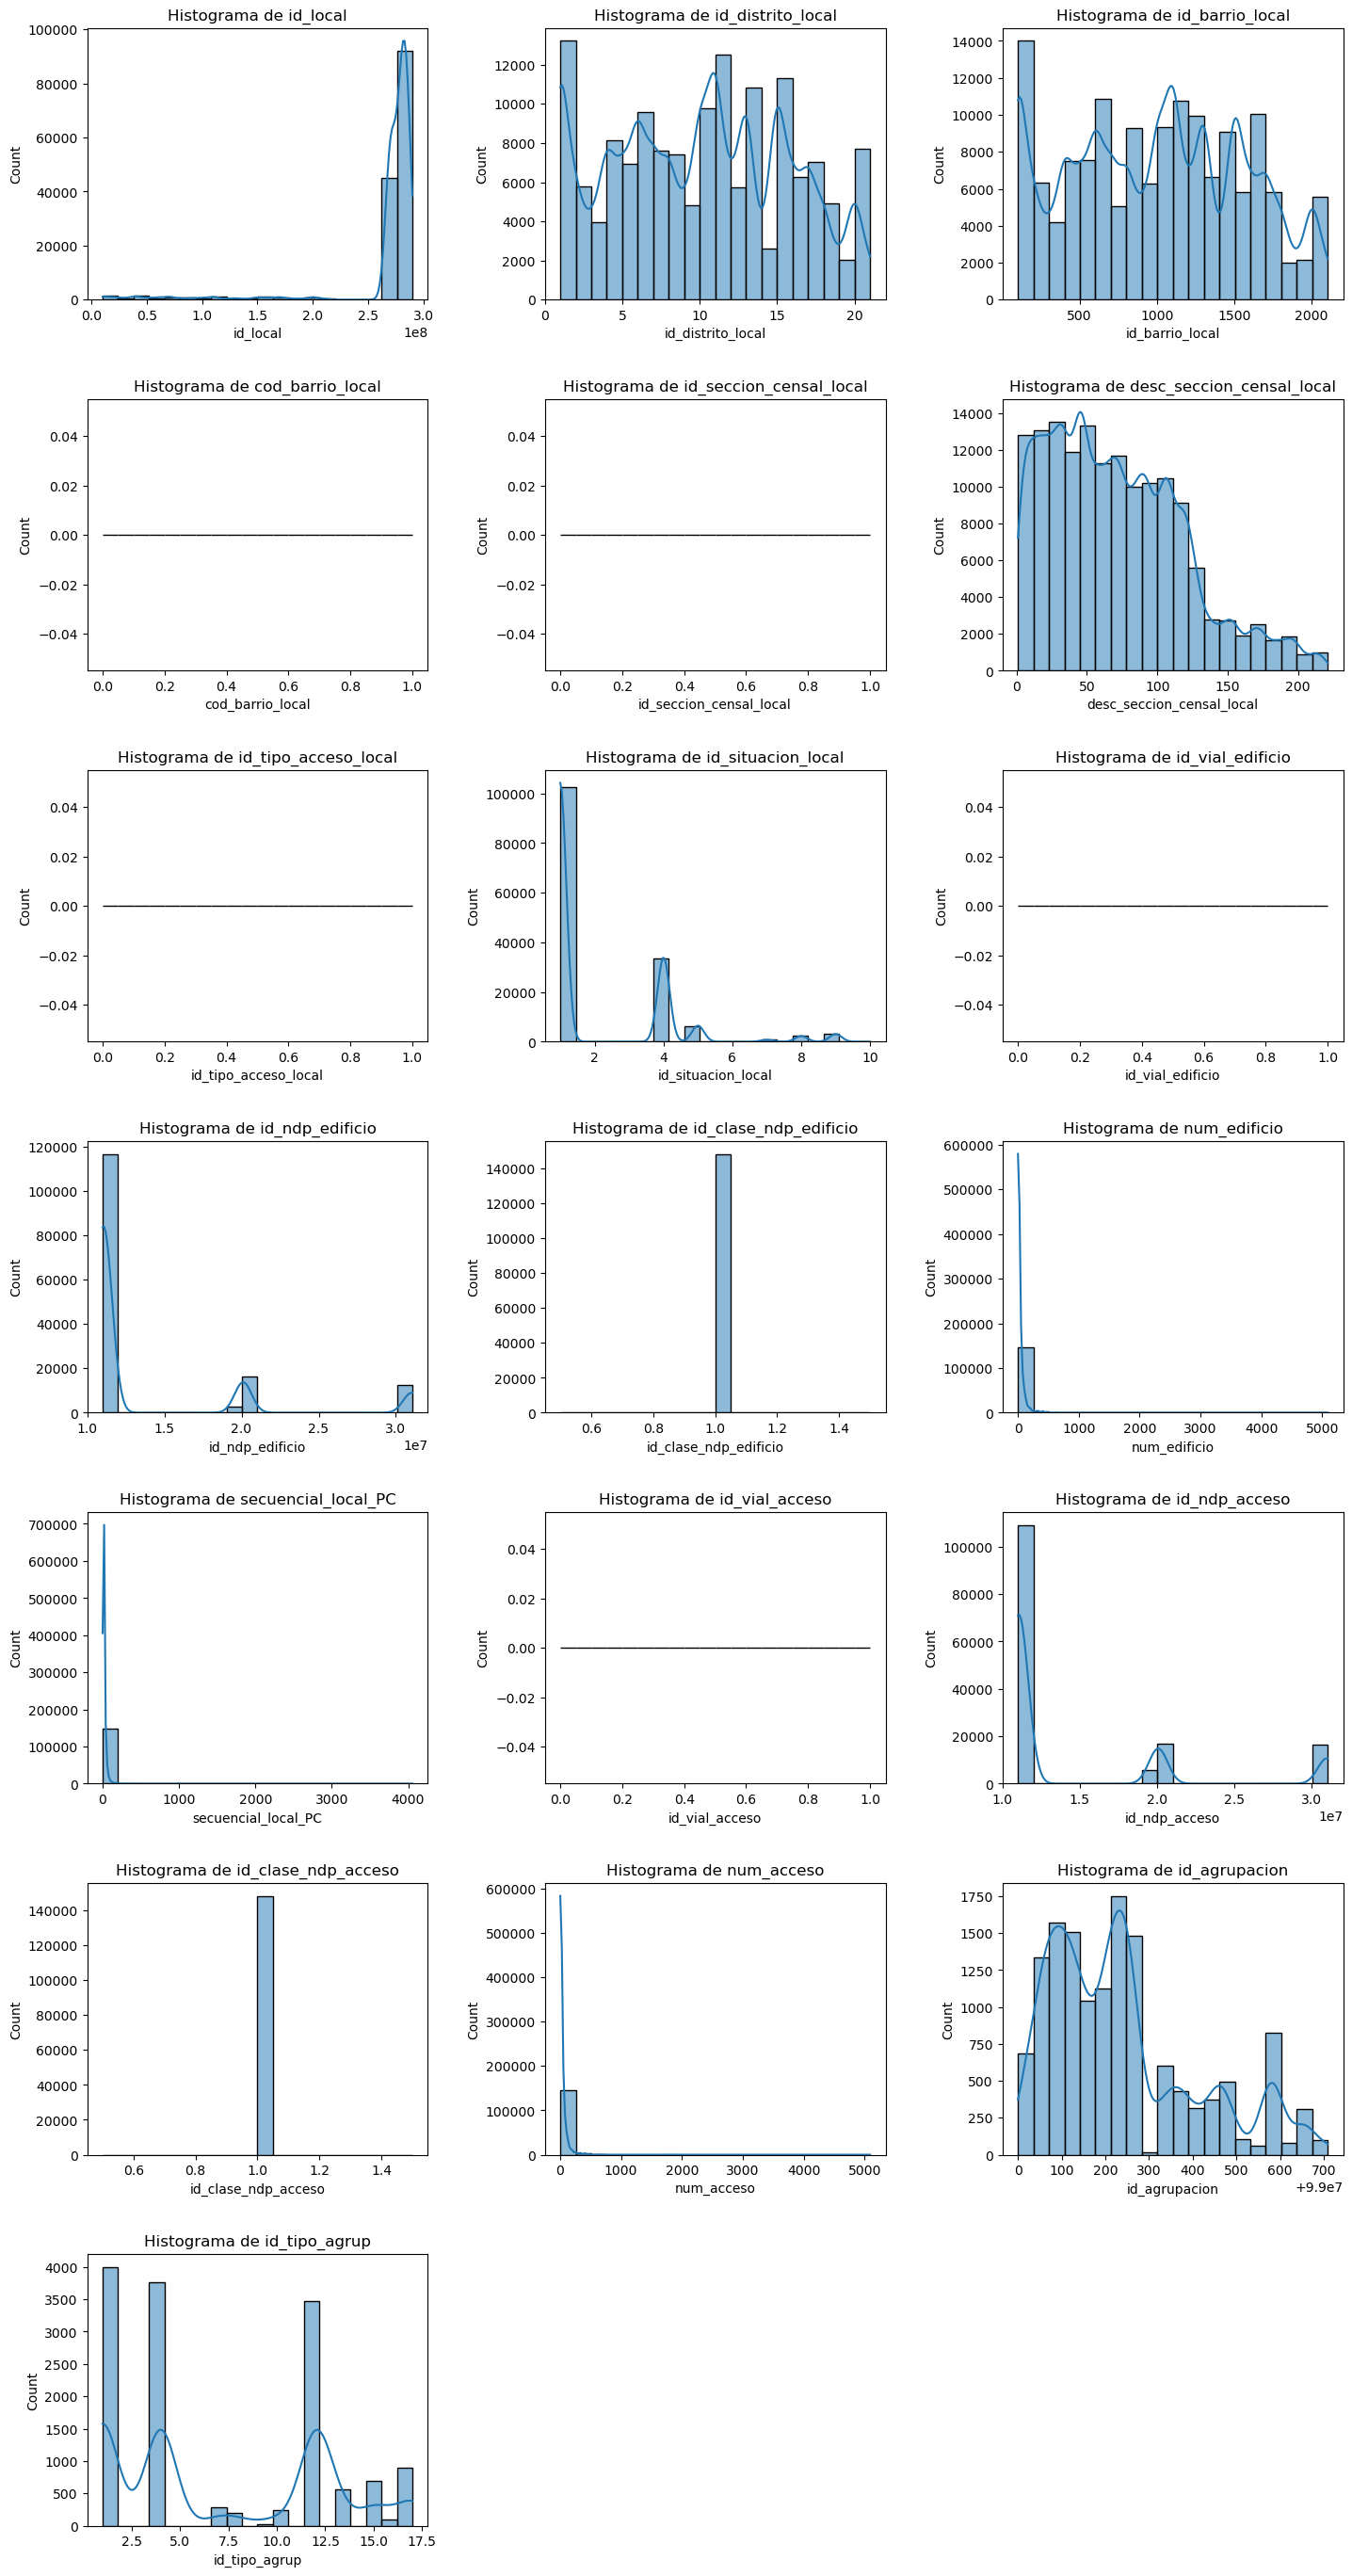

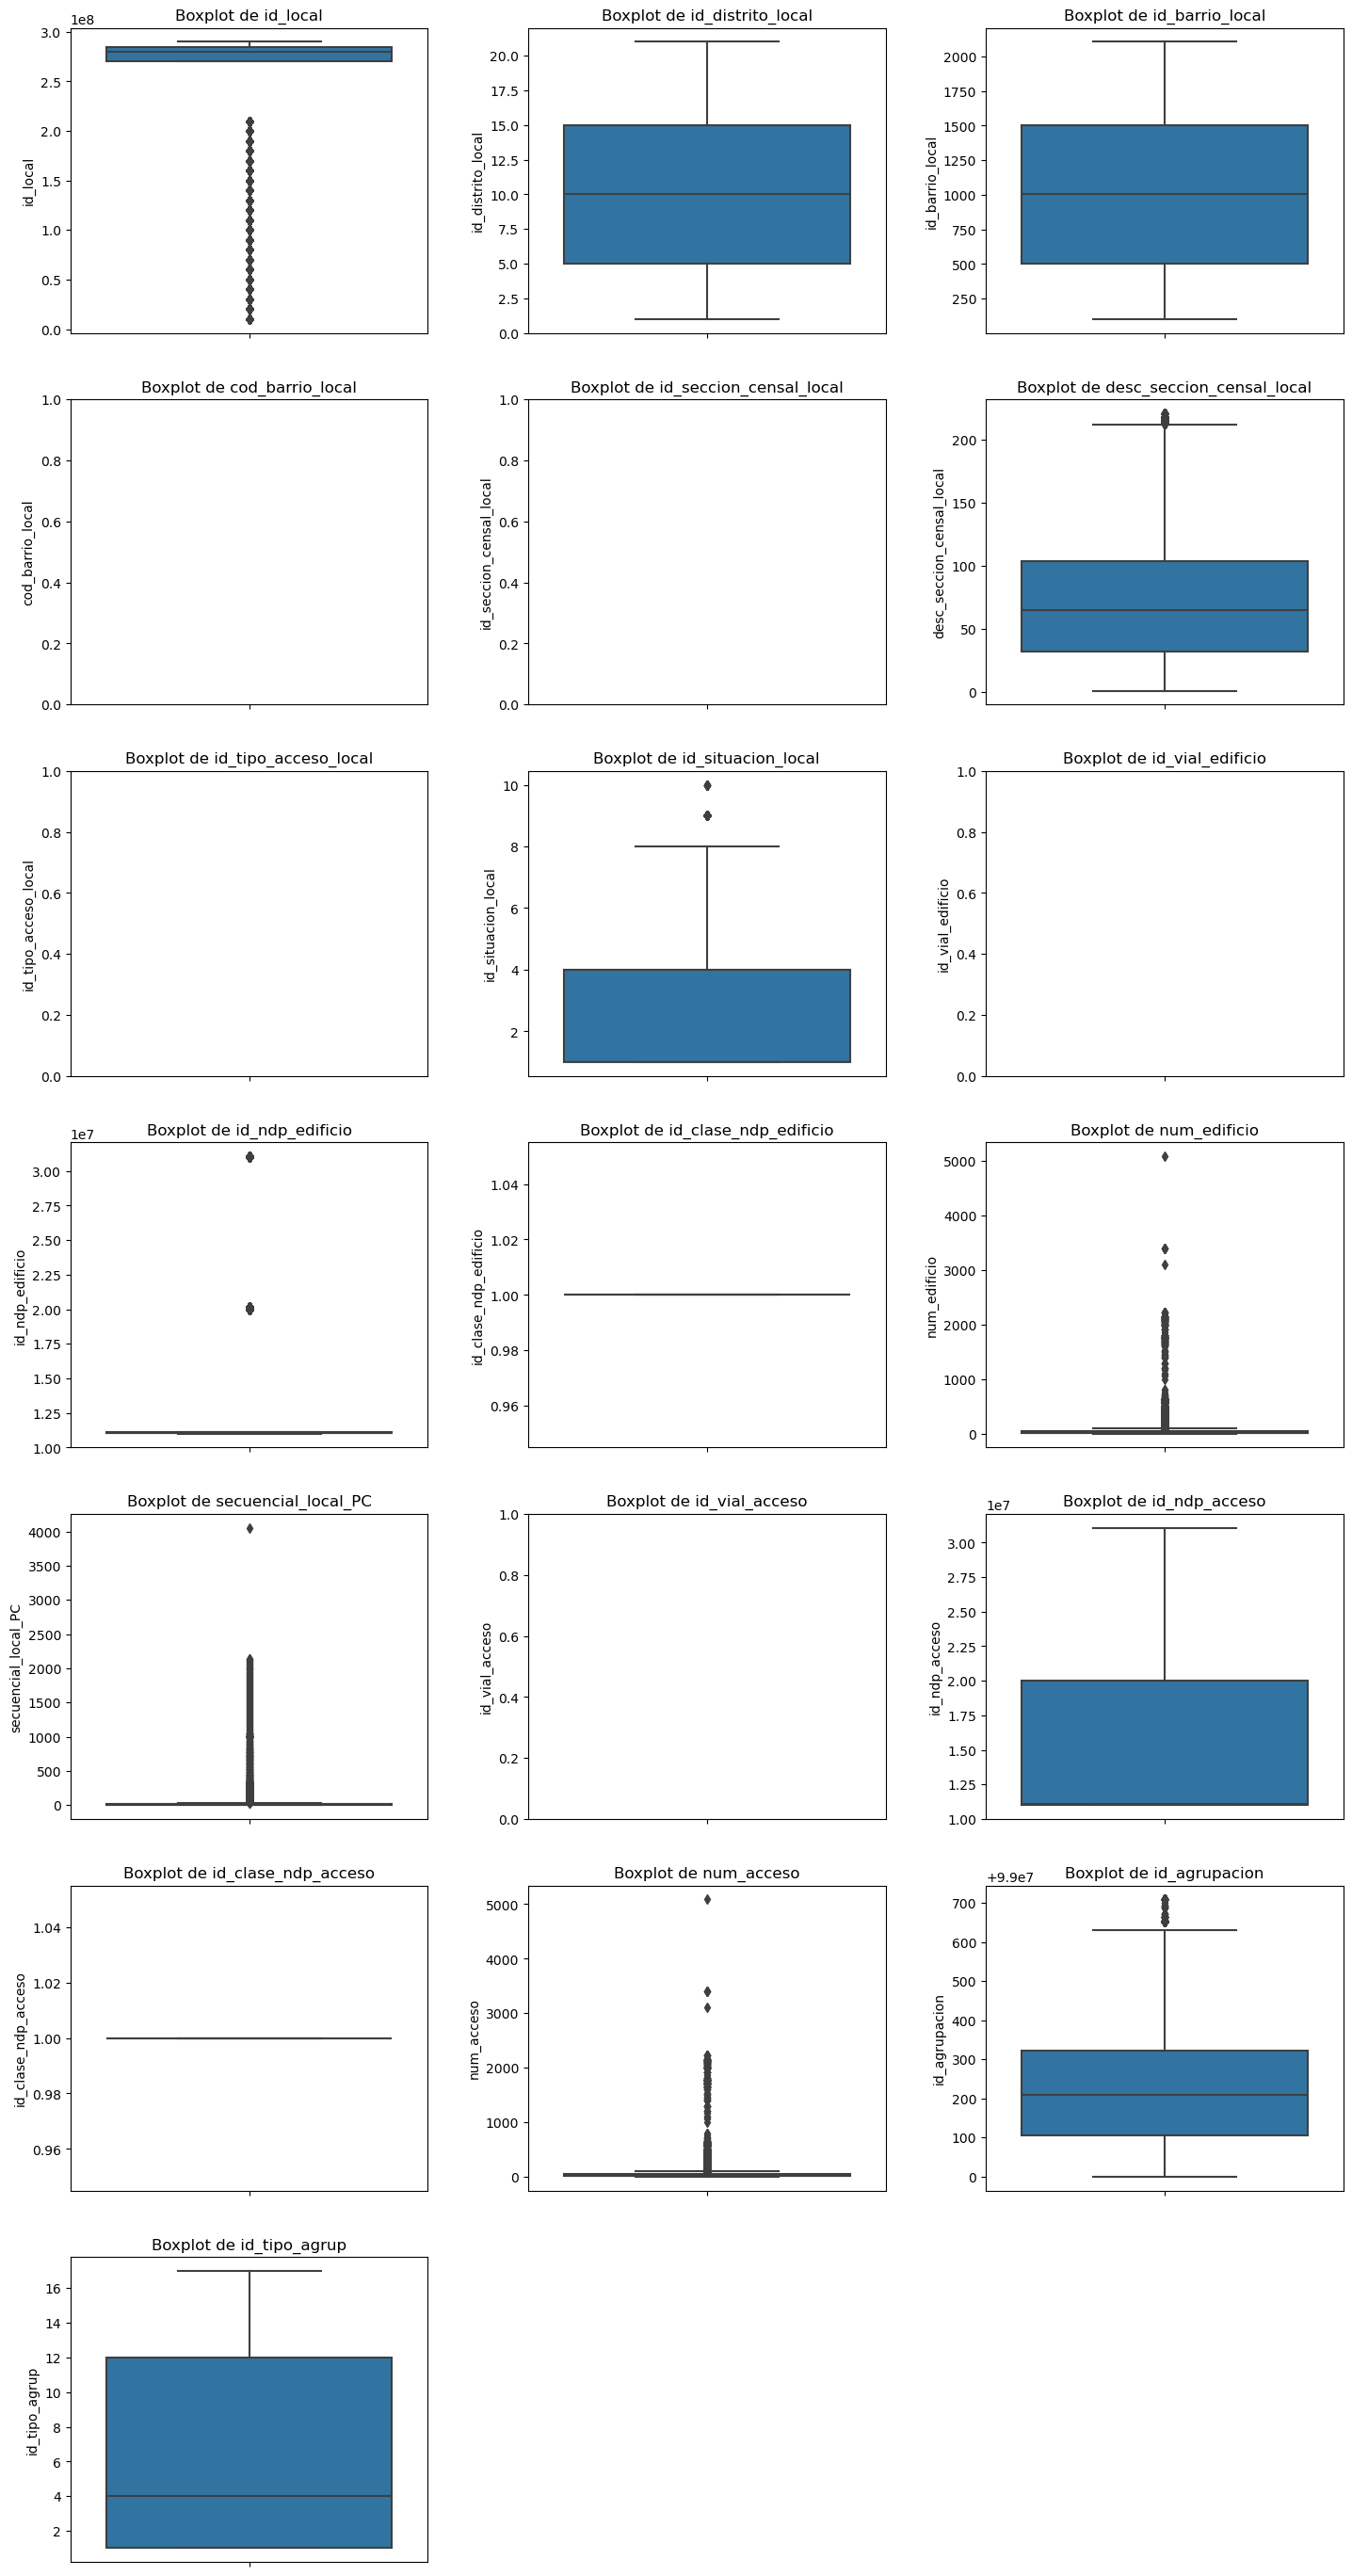

In [23]:
# Filtrar solo las columnas numéricas
numeric_columns = locales.select_dtypes(include=['float64', 'int64']).columns

# Filtrar solo las columnas numéricas
numeric_columns = locales.select_dtypes(include=['float64', 'int64']).columns

# Definir el tamaño de la cuadrícula según el número de columnas
num_plots = len(numeric_columns)
cols = 3  # Número de columnas de subplots (ajustable)
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calcula el número de filas necesarias

# Crear los histogramas con  espacio entre ellos
plt.figure(figsize=(15, rows * 4))  # Ajustar el tamaño de la figura 
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(locales[col], kde=True, bins=20)
    plt.title(f'Histograma de {col}')
    plt.tight_layout(pad=3.0)  # Ajustar el padding entre subplots
plt.show()

# Crear los boxplots con espacio entre ellos
plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data=locales, y=col)
    plt.title(f'Boxplot de {col}')
    plt.tight_layout(pad=3.0)  # Ajustar el padding entre subplots
plt.show()

C:\Users\Yeider\AppData\Local\Temp\ipykernel_1556\4034067222.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_1556\4034067222.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_1556\4034067222.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_1556\4034067222.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_1556\4034067222.py:11: UserWarning: Tight layout not applied. tight_layou

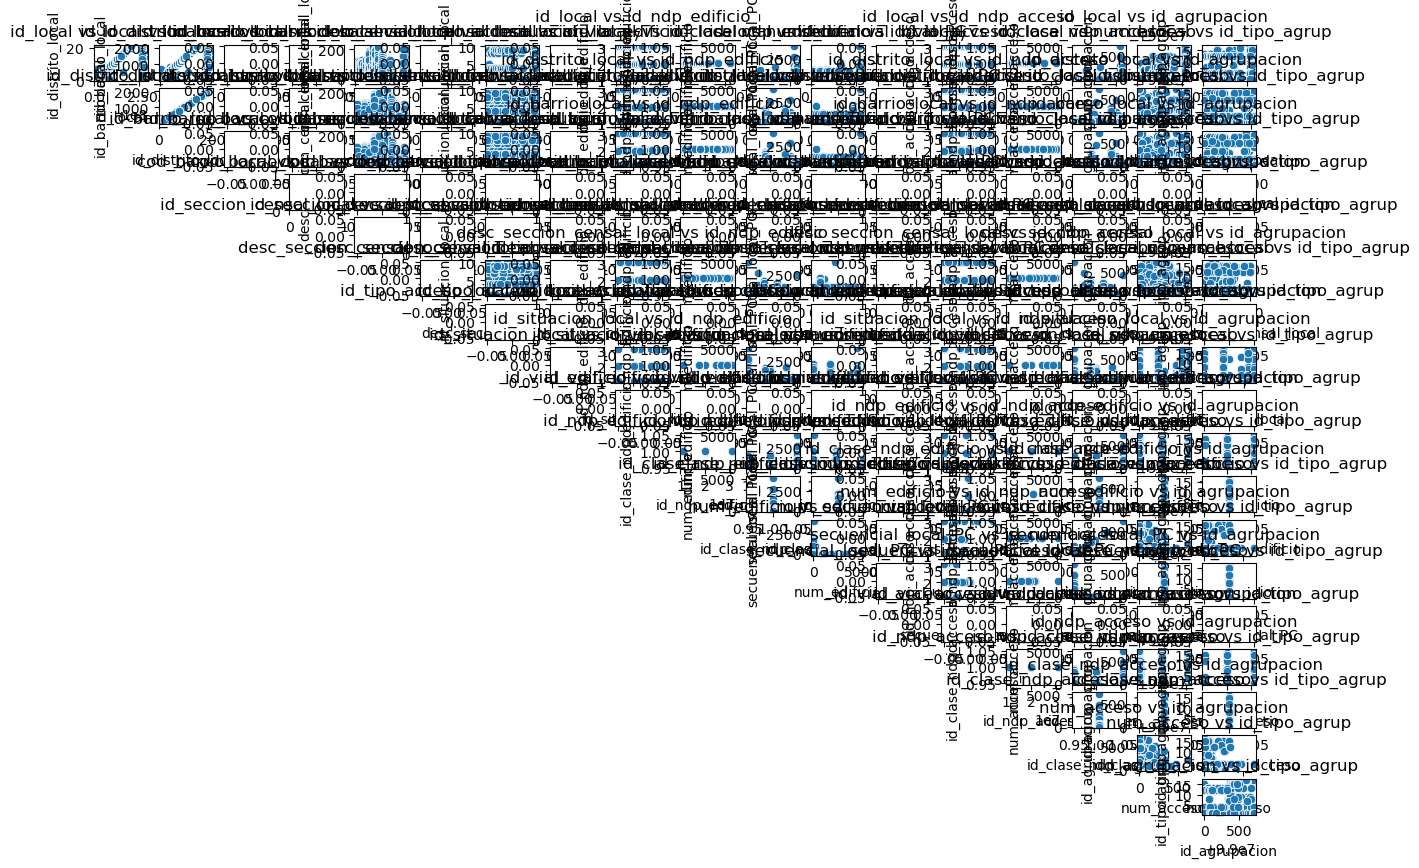

<Figure size 2000x2000 with 0 Axes>

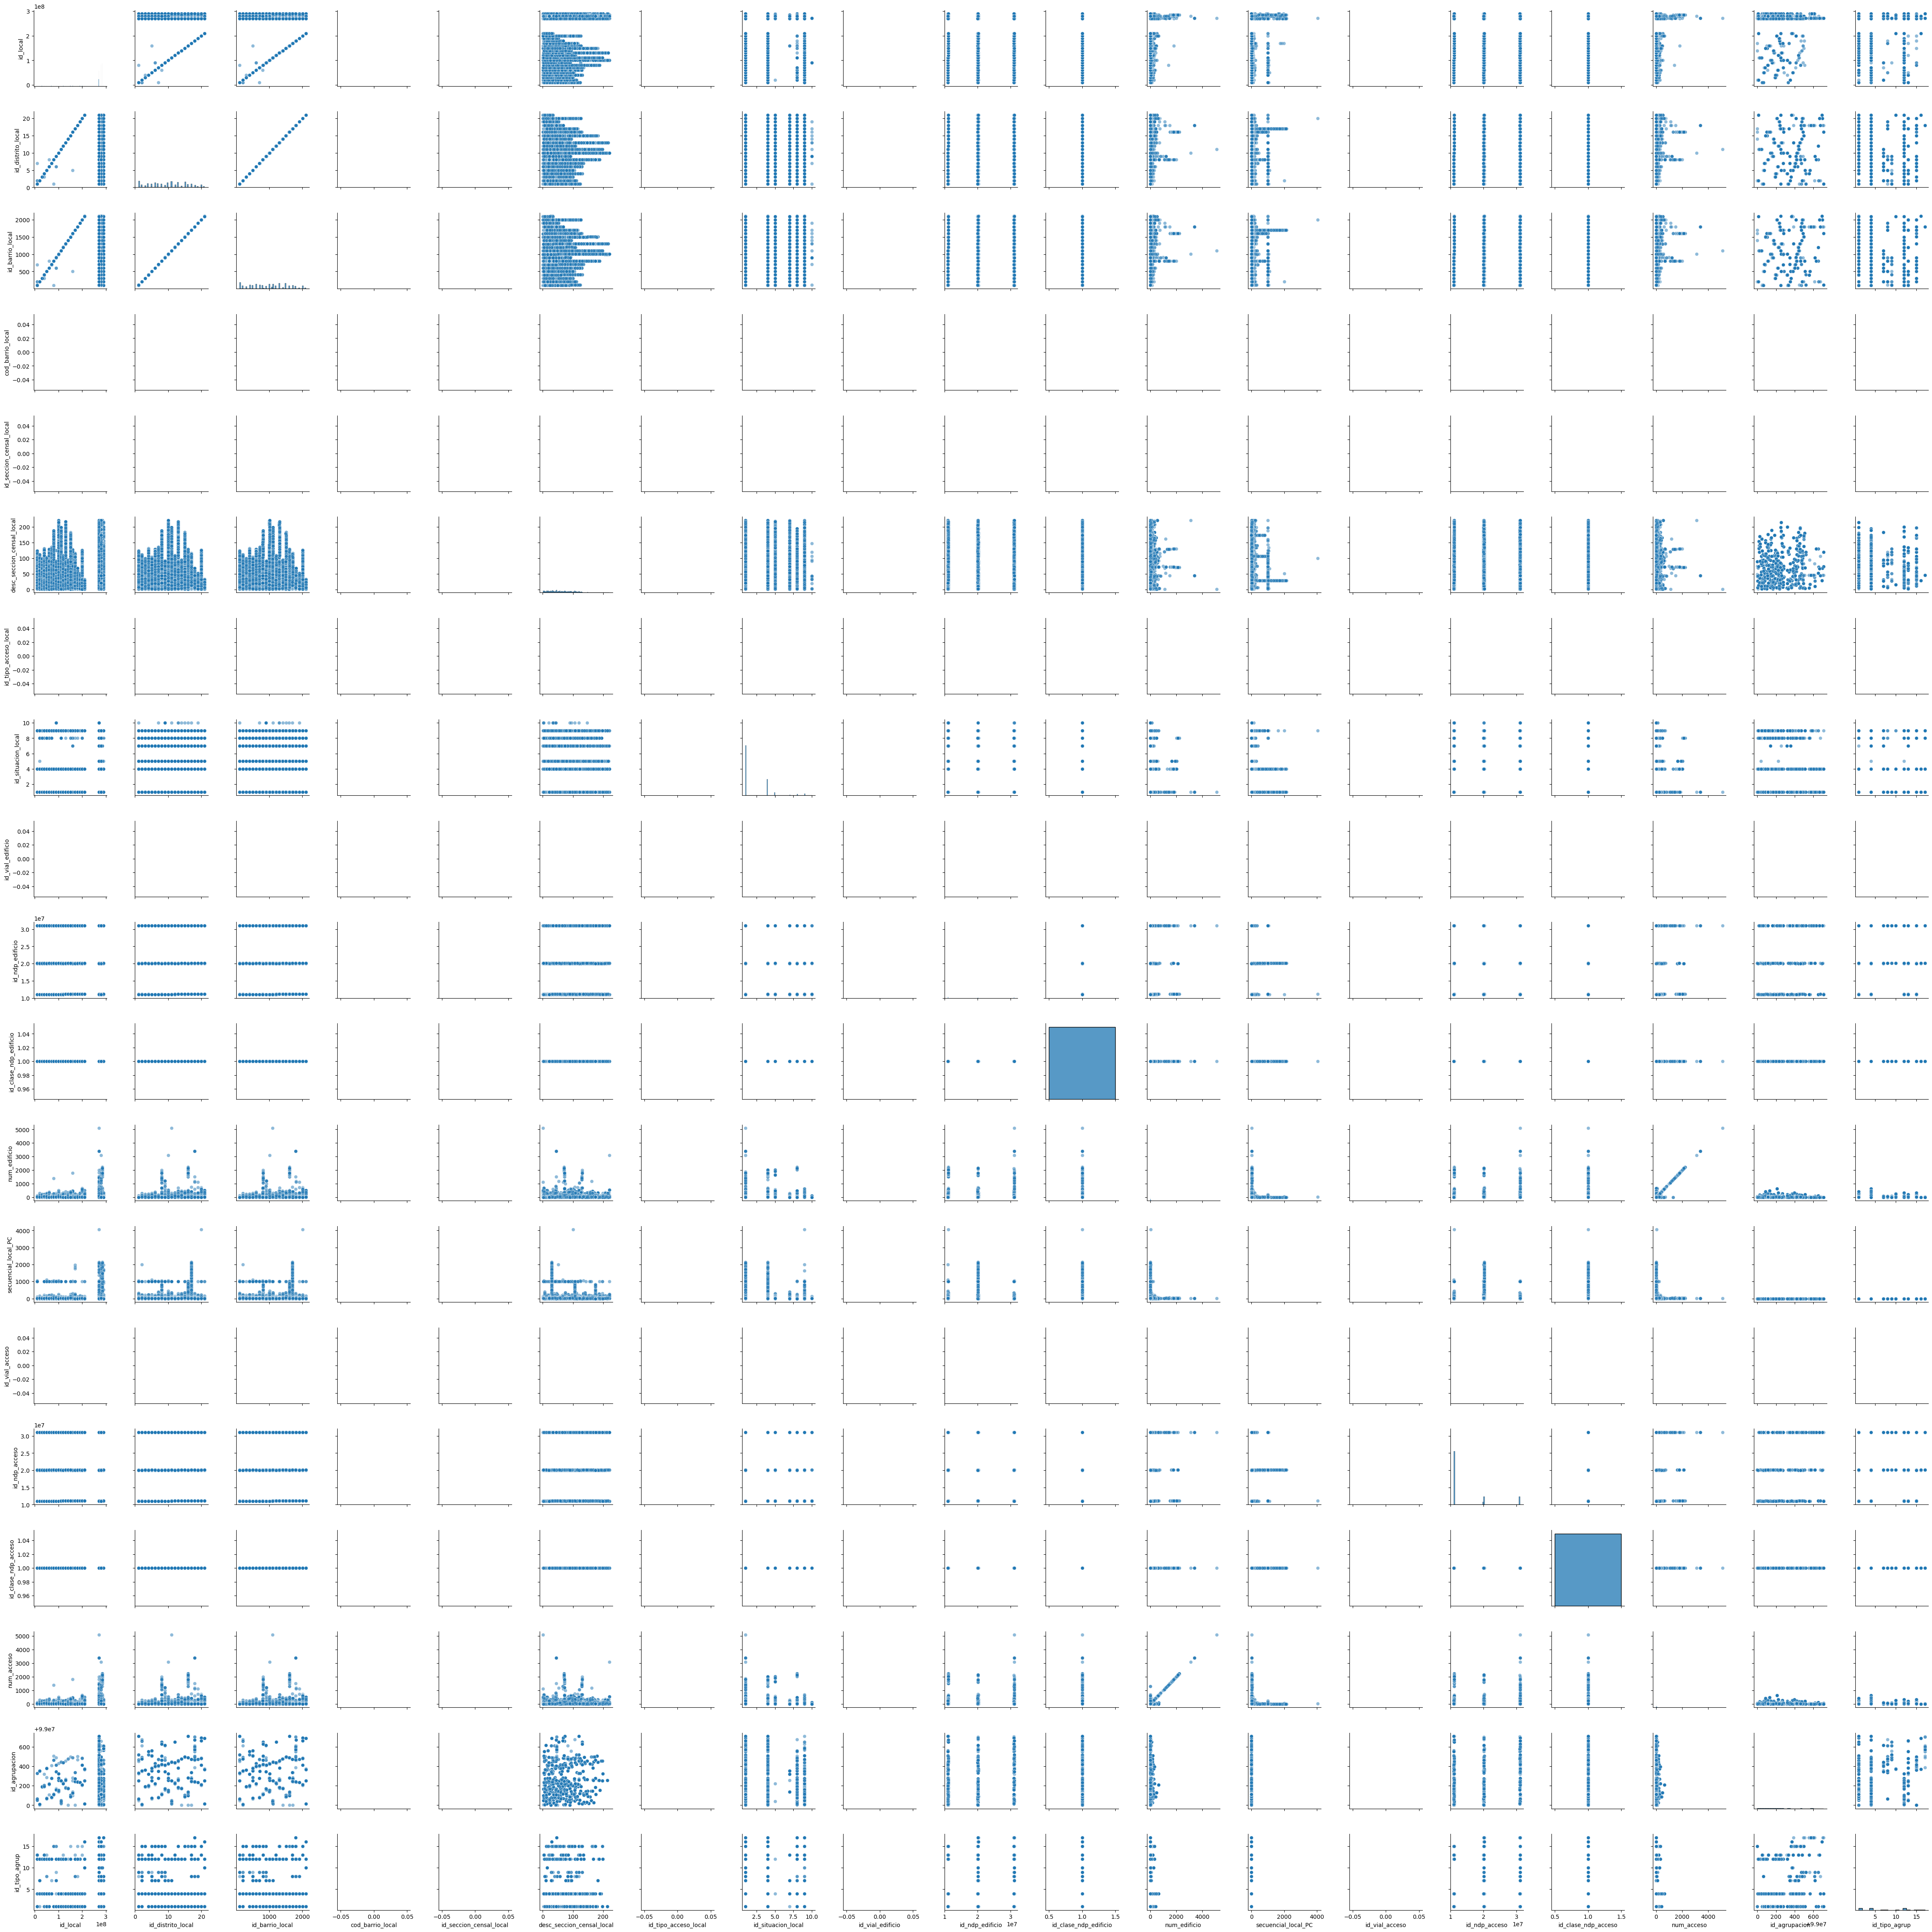

In [24]:
# Filtrar solo las columnas numéricas
numeric_columns = locales.select_dtypes(include=['float64', 'int64']).columns

# Crear gráficos de dispersión entre pares de variables numéricas
plt.figure(figsize=(15, 10))
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        plt.subplot(len(numeric_columns)-1, len(numeric_columns)-1, i * (len(numeric_columns)-1) + j)
        sns.scatterplot(x=locales[numeric_columns[i]], y=locales[numeric_columns[j]])
        plt.title(f'{numeric_columns[i]} vs {numeric_columns[j]}')
        plt.tight_layout(pad=2.0)

# Ajustar el tamaño de la figura y los subgráficos
plt.figure(figsize=(20, 20))  # Aumentar el tamaño de la figura
sns.pairplot(locales, plot_kws={'alpha': 0.5})  # Cambiar el valor alpha para mejorar la visibilidad
plt.tight_layout(pad=3.0)  # Aumentar el espaciado entre subgráficos

# Mostrar el gráfico
plt.show()

In [3]:
# columnas a eliminar
columnas_a_eliminar = ['coordenada_x_agrupacion','coordenada_y_agrup',"cod_barrio_local","id_seccion_censal_local","id_tipo_acceso_local", "id_vial_edificio"]

# Bucle para validar si cada columna está en el DataFrame
for columna in columnas_a_eliminar:
    if columna in locales.columns:
        locales = locales.drop(columna, axis=1)  # Elimina la columna si existe
        print(f'Columna "{columna}" eliminada.')
    else:
        print(f'Columna "{columna}" no encontrada en el DataFrame.')

# Comprobar las columnas restantes
print("\nColumnas restantes:")
print(locales.columns)

Columna "coordenada_x_agrupacion" eliminada.
Columna "coordenada_y_agrup" eliminada.
Columna "cod_barrio_local" eliminada.
Columna "id_seccion_censal_local" eliminada.
Columna "id_tipo_acceso_local" eliminada.
Columna "id_vial_edificio" eliminada.

Columnas restantes:
Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'desc_tipo_acceso_local',
       'id_situacion_local', 'desc_situacion_local', 'clase_vial_edificio',
       'desc_vial_edificio', 'id_ndp_edificio', 'id_clase_ndp_edificio',
       'nom_edificio', 'num_edificio', 'cal_edificio', 'secuencial_local_PC',
       'id_vial_acceso', 'clase_vial_acceso', 'desc_vial_acceso',
       'id_ndp_acceso', 'id_clase_ndp_acceso', 'nom_acceso', 'num_acceso',
       'cal_acceso', 'id_agrupacion', 'nombre_agrupacion', 'id_tipo_agrup',
       'desc_tipo_agrup', 'id_planta_agrupado', 'id_local_agrupado', 'r

In [4]:
# guardar el dataset editado
locales.to_excel('Locales_edit_EDA.xlsx', index=False)